In [86]:
from IPython.display import Image
import pandas as pd
import seaborn as sns
from datetime import date
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from plotly.subplots import make_subplots

In [123]:
df=pd.read_csv('marketing_data.csv')
pd.set_option("display.max_columns", None)
df.set_index('ID',inplace=True)
df.sort_values(by='ID',inplace=True)
df.dtypes


Year_Birth              int64
Education              object
Marital_Status         object
 Income                object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

In [124]:
df[' Income ']=df[' Income '].str.replace('$', '')
df[' Income ']=df[' Income '].str.replace(',', '')
df[' Income ']=df[' Income '].astype(float)


<ipython-input-124-01f07421f258>:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [121]:
df['Age']=np.nan
current_date = date.today() 
for i in range(2234):
    df['Age'].iloc[i]=current_date.year-df['Year_Birth'].iloc[i]


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [119]:
df1=df
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1985,Graduation,Married,70951.0,0,0,05/04/2013,66,239,10,554,254,87,54,1,3,4,9,1,0,0,0,0,0,0,0,SA
1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
9,1975,Master,Single,46098.0,1,1,8/18/12,86,57,0,27,0,0,36,4,3,2,2,8,0,0,0,0,0,0,0,CA
13,1947,PhD,Widow,25358.0,0,1,7/22/13,57,19,0,5,0,0,8,2,1,0,3,6,0,0,0,0,0,0,0,SA
17,1971,PhD,Married,60491.0,0,1,09/06/2013,81,637,47,237,12,19,76,4,6,11,7,5,0,0,0,0,0,0,0,SP


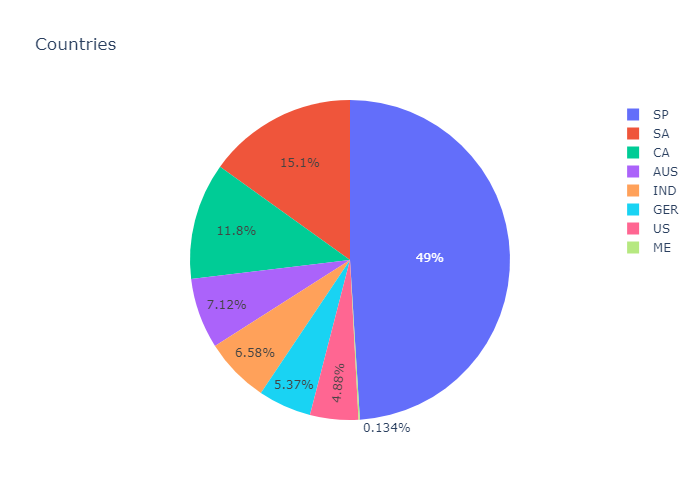

In [5]:
fig = px.pie(df1,names='Country',title='Countries')
fig.write_image("Countries.png")
Image(filename='Countries.png')

Distribution of the customers seems mainly comprise of mostly SP,SA,CA as the consititute about 75% for the sample space.

Distribution of the customers seems mainly comprise of people who have a degree.

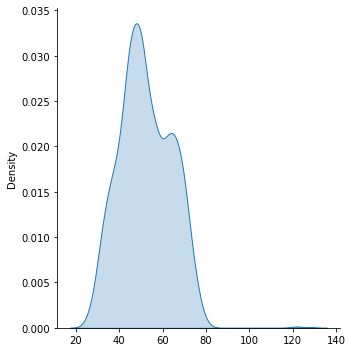

In [6]:
ax=sns.displot(np.array(df['Age']),kind="kde",fill=True)

This indicates that majority of the customers are between the age 40 and 60 when taking all the countries into consideration.

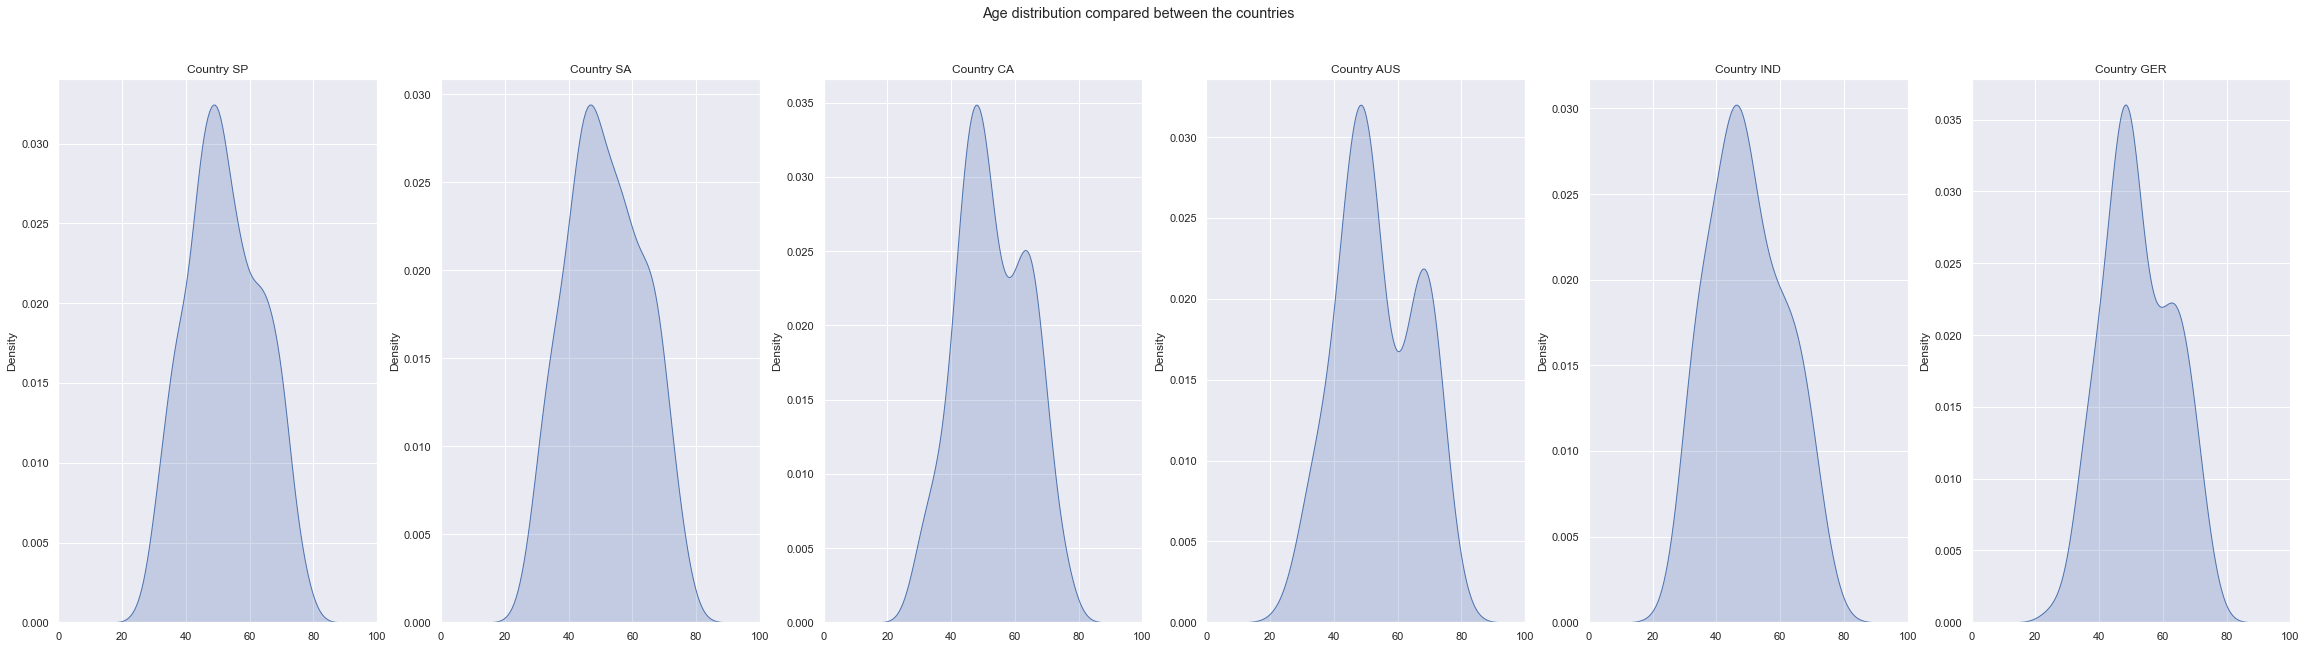

In [7]:
dfSP=df1.loc[df1['Country']=='SP']
dfSA=df1.loc[df1['Country']=='SA']
dfCA=df1.loc[df1['Country']=='CA']
dfAUS=df1.loc[df1['Country']=='AUS']
dfIND=df1.loc[df1['Country']=='IND']
dfGER=df1.loc[df1['Country']=='GER']
sns.set()
fig, axes = plt.subplots(1,6, figsize=(40,10))
fig.suptitle('Age distribution compared between the countries')
sns.kdeplot(np.array(dfSP['Age']),ax=axes[0],fill=True)
axes[0].set_title('Country SP')
sns.kdeplot(np.array(dfSA['Age']),ax=axes[1],fill=True)
axes[1].set_title('Country SA')
sns.kdeplot(np.array(dfCA['Age']),ax=axes[2],fill=True)
axes[2].set_title('Country CA')
sns.kdeplot(np.array(dfAUS['Age']),ax=axes[3],fill=True)
axes[3].set_title('Country AUS')
sns.kdeplot(np.array(dfIND['Age']),ax=axes[4],fill=True)
axes[4].set_title('Country IND')
sns.kdeplot(np.array(dfGER['Age']),ax=axes[5],fill=True)
axes[5].set_title('Country GER')
for ax in fig.axes:
    ax.set_xlim(0,100)        

<AxesSubplot:ylabel='Density'>

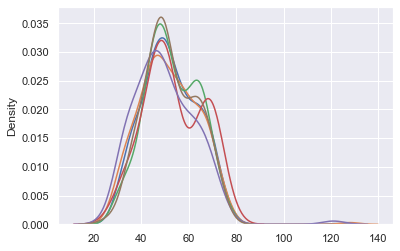

In [8]:
sns.kdeplot(np.array(dfSP['Age']),alpha=0.2)
sns.kdeplot(np.array(dfSA['Age']),alpha=0.2)
sns.kdeplot(np.array(dfCA['Age']),alpha=0.2)
sns.kdeplot(np.array(dfAUS['Age']),alpha=0.2)
sns.kdeplot(np.array(dfIND['Age']),alpha=0.2)
sns.kdeplot(np.array(dfGER['Age']),alpha=0.2)

Age distribution seems pretty similar accross the different countries 

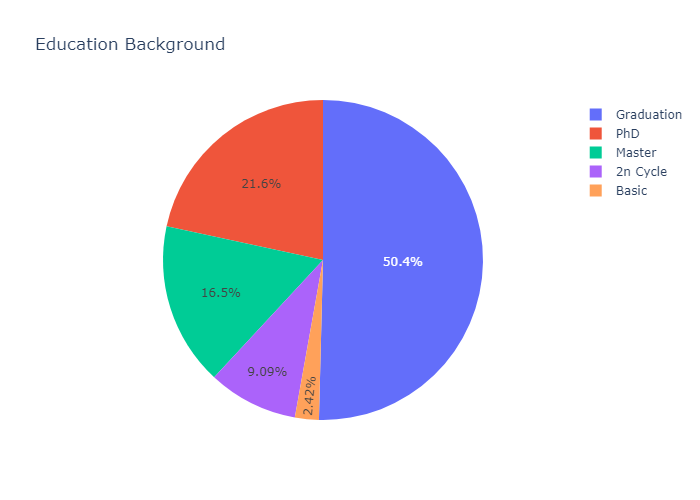

In [9]:
fig = px.pie(df,names='Education',title='Education Background')
fig.write_image("educationbg.png")
Image(filename='educationbg.png')

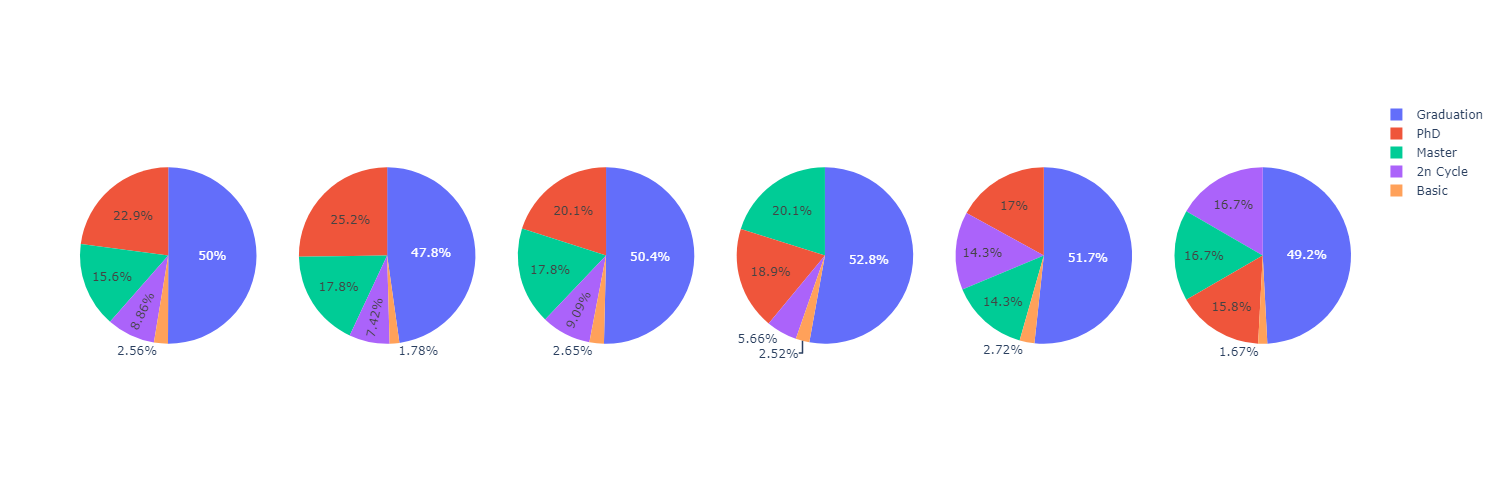

In [50]:
tempSP=dfSP.groupby('Education').count()
tempSA=dfSA.groupby('Education').count()
tempCA=dfCA.groupby('Education').count()
tempAUS=dfAUS.groupby('Education').count()
tempIND=dfIND.groupby('Education').count()
tempGER=dfGER.groupby('Education').count()

labels = ["2n Cycle	", "Basic", "Graduation", "Master", "PhD"]
specs=[[{'type':'domain'},{'type':'domain'},{'type':'domain'},{'type':'domain'},{'type':'domain'},{'type':'domain'}]]
fig = make_subplots(specs=specs,rows=1, cols=6,column_widths=[0.7, 0.7,0.7, 0.7,0.7, 0.7] )

fig.add_trace(go.Pie(labels=labels, values=np.array(tempSP['Marital_Status']), name="Country SP"), row=1, col=1)
fig.add_trace(go.Pie(labels=labels, values=np.array(tempSA['Marital_Status']),  name="Country SA"), row=1, col=2)
fig.add_trace(go.Pie(labels=labels, values=np.array(tempCA['Marital_Status']),  name="Country CA"), row=1, col=3)
fig.add_trace(go.Pie(labels=labels, values=np.array(tempAUS['Marital_Status']),  name="Country AUS"), row=1, col=4)
fig.add_trace(go.Pie(labels=labels, values=np.array(tempIND['Marital_Status']),  name="Country IND"), row=1, col=5)
fig.add_trace(go.Pie(labels=labels, values=np.array(tempGER['Marital_Status']),  name="Country GER"), row=1, col=6)
fig.write_image("EducationCountries.png", width=1500, height=500)
Image(filename='EducationCountries.png')

Text(0.5, 1.0, 'Eduaction GER')

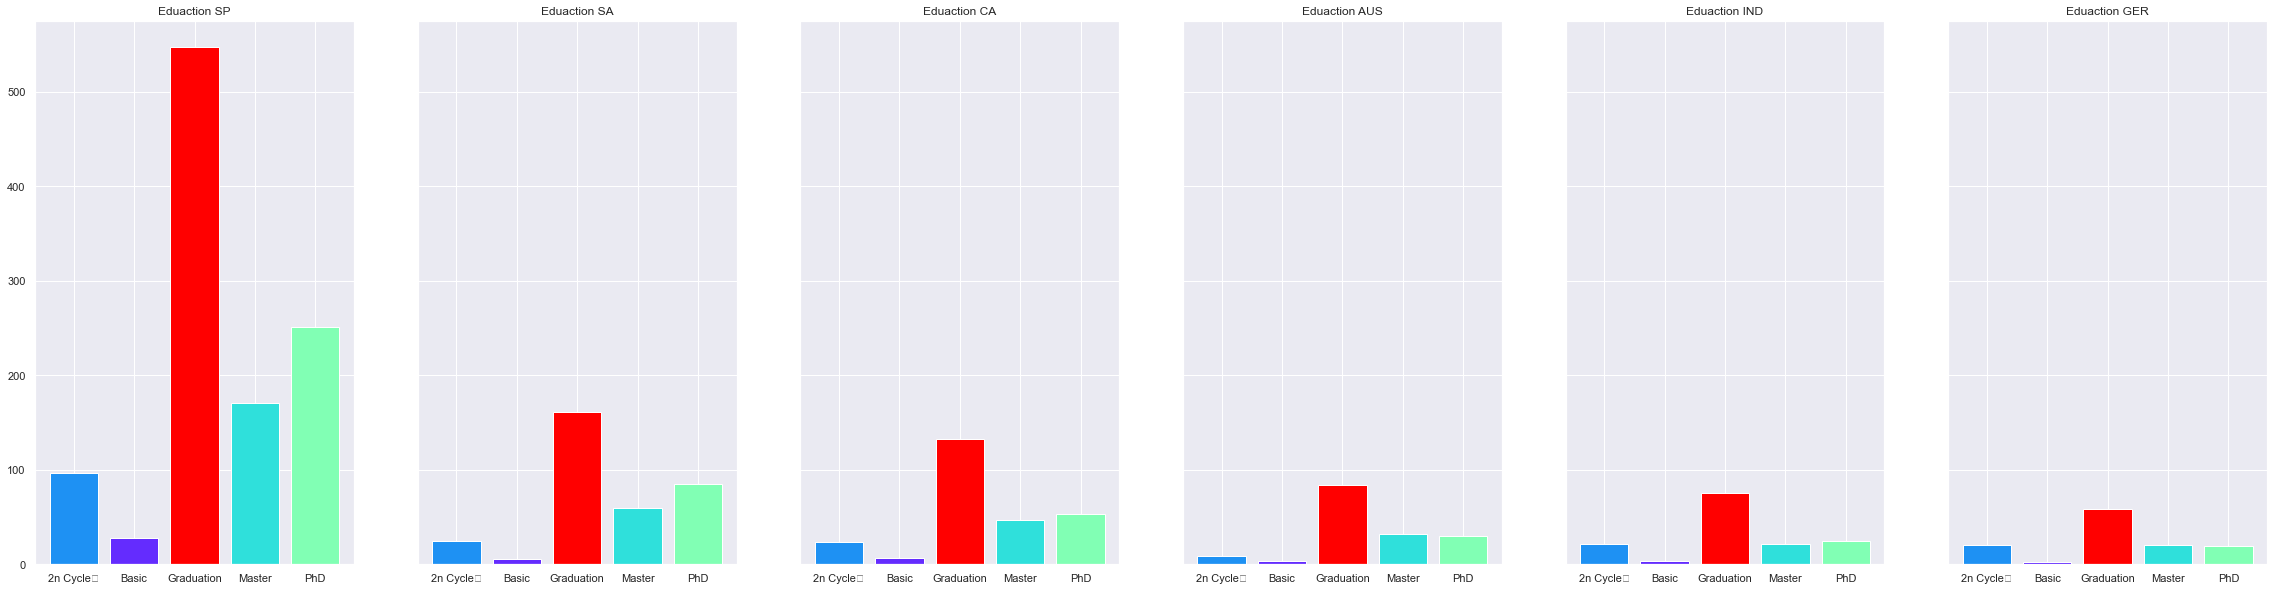

In [111]:
my_cmap = cm.get_cmap('rainbow')
my_norm = Normalize(vmin=0, vmax=500)
fig, (ax1, ax2,ax3, ax4,ax5, ax6) = plt.subplots(1, 6, figsize=(40,10), sharey=True)
ax1.bar(labels,np.array(tempSP['Marital_Status']),color=my_cmap(my_norm(np.array(tempSP['Marital_Status']))))
ax1.set_title('Eduaction SP')
ax2.bar(labels,np.array(tempSA['Marital_Status']),color=my_cmap(my_norm(np.array(tempSP['Marital_Status']))))
ax2.set_title('Eduaction SA')
ax3.bar(labels,np.array(tempCA['Marital_Status']),color=my_cmap(my_norm(np.array(tempSP['Marital_Status']))))
ax3.set_title('Eduaction CA')
ax4.bar(labels,np.array(tempAUS['Marital_Status']),color=my_cmap(my_norm(np.array(tempSP['Marital_Status']))))
ax4.set_title('Eduaction AUS')
ax5.bar(labels,np.array(tempIND['Marital_Status']),color=my_cmap(my_norm(np.array(tempSP['Marital_Status']))))
ax5.set_title('Eduaction IND')
ax6.bar(labels,np.array(tempGER['Marital_Status']),color=my_cmap(my_norm(np.array(tempSP['Marital_Status']))))
ax6.set_title('Eduaction GER')

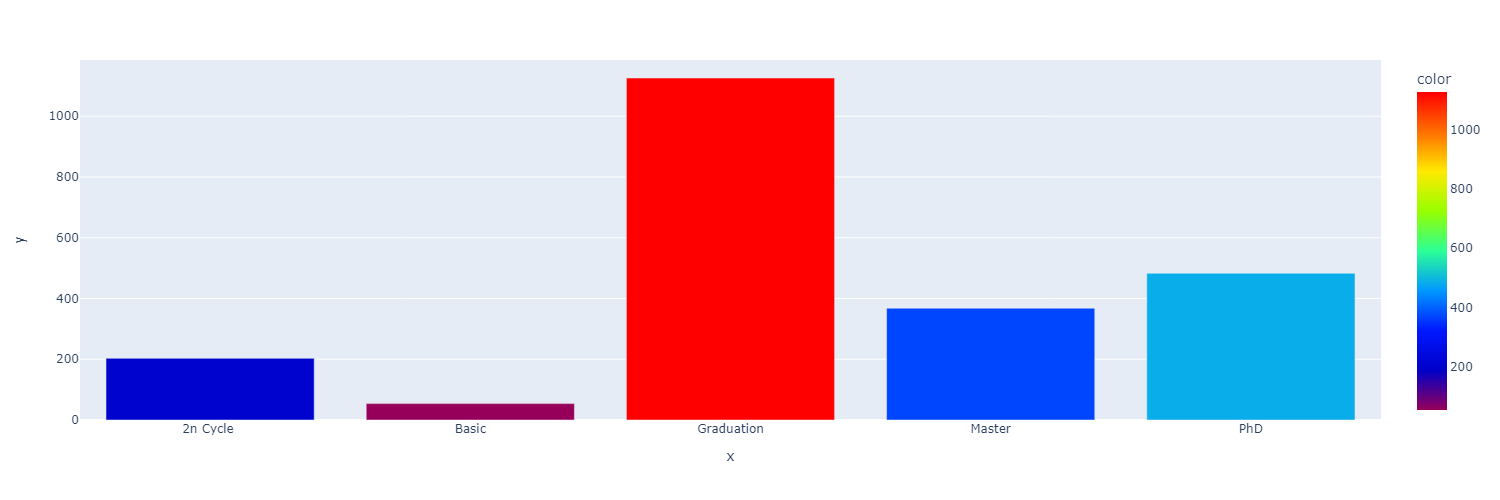

In [115]:
tempdf1=df1.groupby('Education').count()
fig=px.bar(x=labels,y=np.array(tempdf1['Marital_Status']),color=np.array(tempdf1['Marital_Status']), color_continuous_scale='Rainbow')
fig.write_image("EdAll.png", width=1500, height=500)
Image(filename='EdAll.png')

Majority of the customers have a Grad degree and when combined with Master and Phd it comprises mostly of our data.

In [ ]:
dfSP=df1.loc[df1['Country']=='SA']
dfSP.head()

In [ ]:
dfSP.corr()

In [ ]:
plt.pie(df['Country'])
plt.show() 

In [ ]:
dfSA=df.loc[df['Country']=='SA']
dfSA

In [ ]:
plt.scatter(np.array(df['Age']),np.array(df['NumWebPurchases']))
plt.show()

In [ ]:
plt.scatter(np.array(df['Age']),np.array(df['NumWebVisitsMonth']))
plt.show()